# Intro to Classification 01

## MNIST

### Your name :     

### Kaggle Link for exercise :
* [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) : 

#### 실습목표<br>
1. Scikit-Learn 을 이용하여 Logistic Regression을 할 줄 안다.
2. Scikit-Learn 을 이용하여 Artificial Neural Network를 사용할 줄 안다.
---------------
Rayleigh Kim

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rd

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Data Loading & Preparation

In [2]:
import tensorflow as tf

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 4692
다음 그림은 숫자 9 입니다.


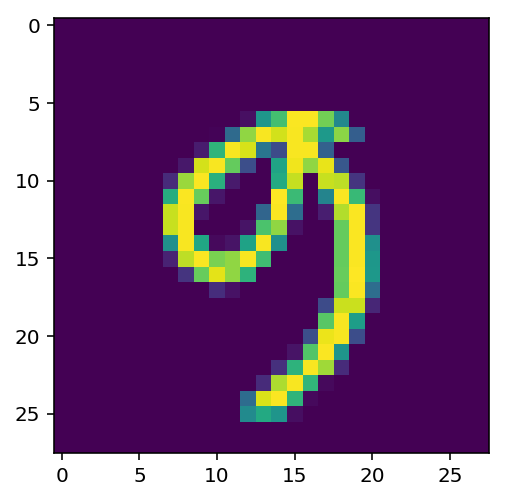

In [4]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
plt.imshow(test_x[id])
plt.show()

단순한 로지스틱 회귀, 뉴럴넷은 28x28의 2차원 데이터를 인풋으로 받지 못한다.

이미지[28 by 28] 를 납작한 array [784] 로 바꿔줄 필요가 있다.

In [5]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


이미지의 값이기 때문에 0 ~ 255 사이의 값을 갖는다.

전부 0~1사이의 값을 갖도록 scale을 조정하자!

In [0]:
print('max :', train_x.max(),'  min :', train_x.min())

In [6]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


## Logistic(Softmax) Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# logistic = MLPClassifier(hidden_layer_sizes=(), early_stopping=True ,verbose=True)
logistic = LogisticRegression(verbose=True)

In [9]:
#train_x.shape, train_y.shape
logistic.fit(train_x,  train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=True,
                   warm_start=False)

In [0]:
logistic_pred_train = logistic.predict(train_x)
logistic_pred_test = logistic.predict(test_x)

logi_train_accuracy = accuracy_score(train_y, logistic_pred_train)
logi_test_accuracy = accuracy_score(test_y, logistic_pred_test)

print('로지스틱 리그레션')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

In [0]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
print('모델의 예측 : {}'.format(logistic_pred_test[id]))
if test_y[id] == logistic_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

In [0]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == logistic_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

 
print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
print('모델의 예측 : {}'.format(logistic_pred_test[id]))
if test_y[id] == logistic_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

## Artificial Neural Networks

In [0]:
ANN = MLPClassifier(hidden_layer_sizes=(512,),
                         early_stopping=True ,verbose=True)

In [0]:
ANN.fit(train_x, train_y)

In [0]:
ann_pred_train = ANN.predict(train_x)
ann_pred_test = ANN.predict(test_x)

ann_train_accuracy = accuracy_score(train_y, ann_pred_train)
ann_test_accuracy = accuracy_score(test_y, ann_pred_test)

print('인공신경망')
print('트레이닝 정확도 : {:.2f}%'.format(ann_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(ann_test_accuracy*100))

In [0]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
print('모델의 예측 : {}'.format(ann_pred_test[id]))
if test_y[id] == ann_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

In [0]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == ann_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

 
print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
print('모델의 예측 : {}'.format(ann_pred_test[id]))
if test_y[id] == ann_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

# 새로운 데이터로, 처음부터 실습!

들어는 보았는가 Fashion MNIST?

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rd

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 2427
다음 그림은 Dress 입니다.


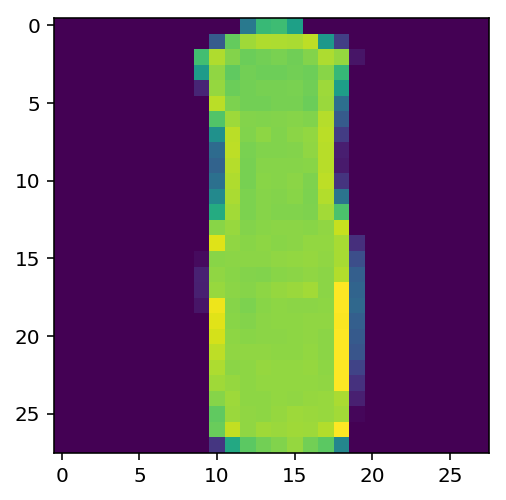

In [4]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

labels = ['T-shirt/Top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

id = rd.randrange(0,10000)
lid = test_y[id]

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[lid]) )
plt.imshow(test_x[id])
plt.show()

In [0]:
###### Now, Your Turn!